# Trabalho 2
Trabalho 2 de Machine Learning: Artigo sobre Classificação

## Loading libraries and dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d (%5.2f%%)' % (col,data[col].isna().sum(), data[col].isna().sum()/len(data)*100))

Number of instances = 13580
Number of attributes = 21
Number of missing values:
	Suburb: 0 ( 0.00%)
	Address: 0 ( 0.00%)
	Rooms: 0 ( 0.00%)
	Type: 0 ( 0.00%)
	Price: 0 ( 0.00%)
	Method: 0 ( 0.00%)
	SellerG: 0 ( 0.00%)
	Date: 0 ( 0.00%)
	Distance: 0 ( 0.00%)
	Postcode: 0 ( 0.00%)
	Bedroom2: 0 ( 0.00%)
	Bathroom: 0 ( 0.00%)
	Car: 62 ( 0.46%)
	Landsize: 0 ( 0.00%)
	BuildingArea: 6450 (47.50%)
	YearBuilt: 5375 (39.58%)
	CouncilArea: 1369 (10.08%)
	Lattitude: 0 ( 0.00%)
	Longtitude: 0 ( 0.00%)
	Regionname: 0 ( 0.00%)
	Propertycount: 0 ( 0.00%)


## Pre-processing

In [5]:
# Dropping lines with NaN
data.dropna(inplace=True)

In [6]:
# Creating classes
data['PriceRange'] = pd.cut(data['Price'],[0,500000,1000000,1500000,np.inf],labels=['Baixo','Médio','Alto','Altíssimo'])

In [7]:
# Dropping useless data
data.drop(['Address', 'Price', 'Method', 'SellerG', 'Date', 'Lattitude', 'Longtitude'], inplace=True, axis=1)

data.head()

,Suburb,Rooms,Type,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,PriceRange
1,Abbotsford,2,h,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,Alto
2,Abbotsford,3,h,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,Alto
4,Abbotsford,4,h,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0,Altíssimo
6,Abbotsford,3,h,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,Northern Metropolitan,4019.0,Altíssimo
7,Abbotsford,2,h,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,Northern Metropolitan,4019.0,Altíssimo


In [8]:
# Set variables for the targets and features
y = data['PriceRange']

X = pd.get_dummies(data.drop(['PriceRange'], axis=1))

## Holdout

In [9]:
# Holdout
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=7)

## Random Forest Classifier

In [10]:
# Create the classifier and fit it to our training data
model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(train_X, train_y)

RandomForestClassifier(random_state=7)

In [11]:
# Predict classes given the validation features
pred_y = model.predict(test_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.7527437056165268


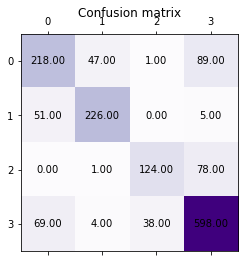

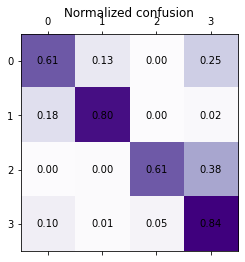

In [12]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(test_y, pred_y)

fig, ax = plt.subplots()
ax.matshow(confusion,cmap='Purples')
ax.set_title(label='Confusion matrix')

for (i, j), z in np.ndenumerate(confusion):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')


normalizedConfusion = np.array([])

# Normalizing by the true label counts to get rates
for row in confusion:
    normalizedConfusion = np.append( normalizedConfusion, row/row.sum())

normalizedConfusion = np.reshape(normalizedConfusion,(4,4))

fig2, ax2 = plt.subplots()
ax2.matshow(normalizedConfusion,cmap='Purples')
ax2.set_title(label='Normalized confusion')

for (i, j), z in np.ndenumerate(normalizedConfusion):
    ax2.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')


## K-Nearest Neighbors

In [13]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)

KNeighborsClassifier()

In [14]:
# Predict classes given the validation features
pred_y = classifier.predict(test_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.6559070367979342


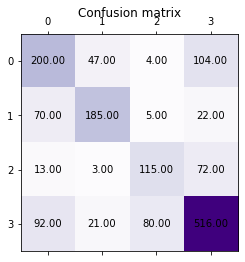

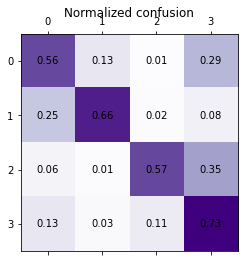

In [15]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(test_y, pred_y)

fig, ax = plt.subplots()
ax.matshow(confusion,cmap='Purples')
ax.set_title(label='Confusion matrix')

for (i, j), z in np.ndenumerate(confusion):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')


normalizedConfusion = np.array([])

# Normalizing by the true label counts to get rates
for row in confusion:
    normalizedConfusion = np.append( normalizedConfusion, row/row.sum())

normalizedConfusion = np.reshape(normalizedConfusion,(4,4))

fig2, ax2 = plt.subplots()
ax2.matshow(normalizedConfusion,cmap='Purples')
ax2.set_title(label='Normalized confusion')

for (i, j), z in np.ndenumerate(normalizedConfusion):
    ax2.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

## Naïve Bayes

In [16]:
# Naive Bayes
gnb = GaussianNB()
model = gnb.fit(train_X, train_y)

In [17]:
# Predict classes given the validation features
pred_y = gnb.predict(test_X)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(test_y, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.5513234344738541


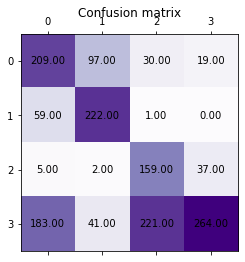

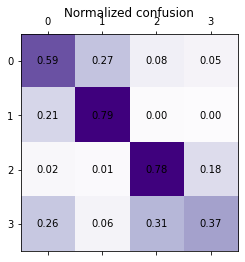

In [18]:
# Calculate the confusion matrix itself
confusion = metrics.confusion_matrix(test_y, pred_y)

fig, ax = plt.subplots()
ax.matshow(confusion,cmap='Purples')
ax.set_title(label='Confusion matrix')

for (i, j), z in np.ndenumerate(confusion):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')


normalizedConfusion = np.array([])

# Normalizing by the true label counts to get rates
for row in confusion:
    normalizedConfusion = np.append( normalizedConfusion, row/row.sum())

normalizedConfusion = np.reshape(normalizedConfusion,(4,4))

fig2, ax2 = plt.subplots()
ax2.matshow(normalizedConfusion,cmap='Purples')
ax2.set_title(label='Normalized confusion')

for (i, j), z in np.ndenumerate(normalizedConfusion):
    ax2.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

## Multilayer Perceptron

In [20]:
# MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

ModuleNotFoundError: No module named 'keras'

In [19]:
print("Input size: ", len(X.columns))

       Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1          2       2.5    3067.0       2.0       1.0  0.0     156.0   
2          3       2.5    3067.0       3.0       2.0  0.0     134.0   
4          4       2.5    3067.0       3.0       1.0  2.0     120.0   
6          3       2.5    3067.0       4.0       2.0  0.0     245.0   
7          2       2.5    3067.0       2.0       1.0  2.0     256.0   
...      ...       ...       ...       ...       ...  ...       ...   
12205      3      35.5    3757.0       3.0       2.0  1.0     972.0   
12206      3       6.8    3016.0       3.0       1.0  0.0     179.0   
12207      1       6.8    3016.0       1.0       1.0  1.0       0.0   
12209      2       4.6    3181.0       2.0       1.0  1.0       0.0   
12212      6       6.3    3013.0       6.0       3.0  2.0    1087.0   

       BuildingArea  YearBuilt  Propertycount  ...  CouncilArea_Yarra  \
1             79.00     1900.0         4019.0  ...                  1   
2

In [20]:
# define baseline model
def baseline_model():
    input_size = len(X.columns)

    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=input_size, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [21]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [22]:
kfold = KFold(n_splits=10, shuffle=True)

In [23]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %f%%" % (results.mean()*100))

Baseline: 55.52% (12.44%)
